In [1]:
!pip install fasteda

In [2]:
!pip install datacleaner

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
import seaborn as sns
from scipy.stats import spearmanr

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from fasteda import fast_eda
from datacleaner import autoclean
import scipy
import scipy.stats as stats

from collections import Counter

In [4]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


In [5]:
# Get the number of rows (samples) and columns (features)
num_samples, num_features = data.shape

# Print the number of samples and features
print(f"Number of Samples (Transactions): {num_samples}")
print(f"Number of Features (Attributes): {num_features}")

Number of Samples (Transactions): 284807
Number of Features (Attributes): 31


In [6]:
data.info

<bound method DataFrame.info of              Time      V1     V2     V3     V4     V5     V6     V7     V8  \
0           0.000  -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099   
1           0.000   1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085   
2           1.000  -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248   
3           1.000  -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377   
4           2.000  -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271   
...           ...     ...    ...    ...    ...    ...    ...    ...    ...   
284802 172786.000 -11.881 10.072 -9.835 -2.067 -5.364 -2.607 -4.918  7.305   
284803 172787.000  -0.733 -0.055  2.035 -0.739  0.868  1.058  0.024  0.295   
284804 172788.000   1.920 -0.301 -3.250 -0.558  2.631  3.031 -0.297  0.708   
284805 172788.000  -0.240  0.530  0.703  0.690 -0.378  0.624 -0.686  0.679   
284806 172792.000  -0.533 -0.190  0.703 -0.506 -0.013 -0.650  1.577 -0.415   

           V9    V10    V11    

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

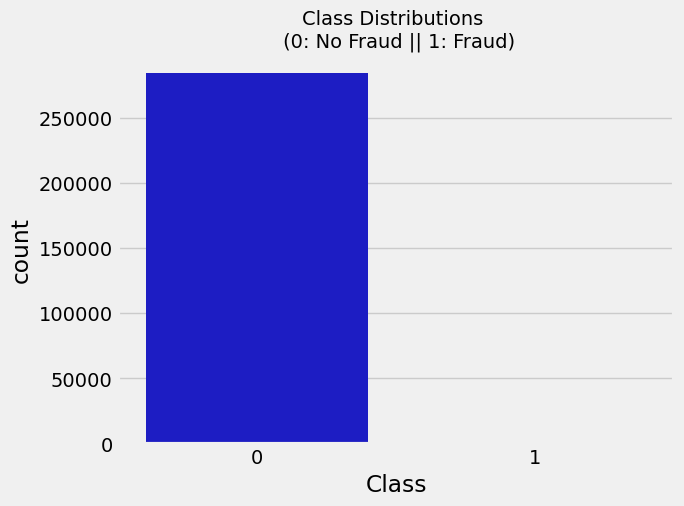

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
data[data.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Descriptive Statistics for Numerical Features

In [10]:
# Select only the numerical features (Time, Transaction Amount, V1 to V28)
numerical_features = data[['Time', 'Amount'] + ['V' + str(i) for i in range(1, 29)]]

# Calculate statistics for each numerical feature
statistics = numerical_features.describe()

# Calculate percentiles separately
percentiles = numerical_features.quantile([0.25, 0.50, 0.75])

# Print the statistics and percentiles
print("Basic Statistics:")
print(statistics)

print("\nPercentiles:")
print(percentiles)

# Calculate statistics for 'Class' column (fraud or not fraud)
class_statistics = data['Class'].value_counts()

# Print class distribution
print("\nClass Distribution:")
print(class_statistics)


Basic Statistics:
            Time     Amount         V1         V2         V3         V4  \
count 284807.000 284807.000 284807.000 284807.000 284807.000 284807.000   
mean   94813.860     88.350      0.000      0.000     -0.000      0.000   
std    47488.146    250.120      1.959      1.651      1.516      1.416   
min        0.000      0.000    -56.408    -72.716    -48.326     -5.683   
25%    54201.500      5.600     -0.920     -0.599     -0.890     -0.849   
50%    84692.000     22.000      0.018      0.065      0.180     -0.020   
75%   139320.500     77.165      1.316      0.804      1.027      0.743   
max   172792.000  25691.160      2.455     22.058      9.383     16.875   

              V5         V6         V7         V8         V9        V10  \
count 284807.000 284807.000 284807.000 284807.000 284807.000 284807.000   
mean      -0.000      0.000     -0.000     -0.000     -0.000      0.000   
std        1.380      1.332      1.237      1.194      1.099      1.089   
min   

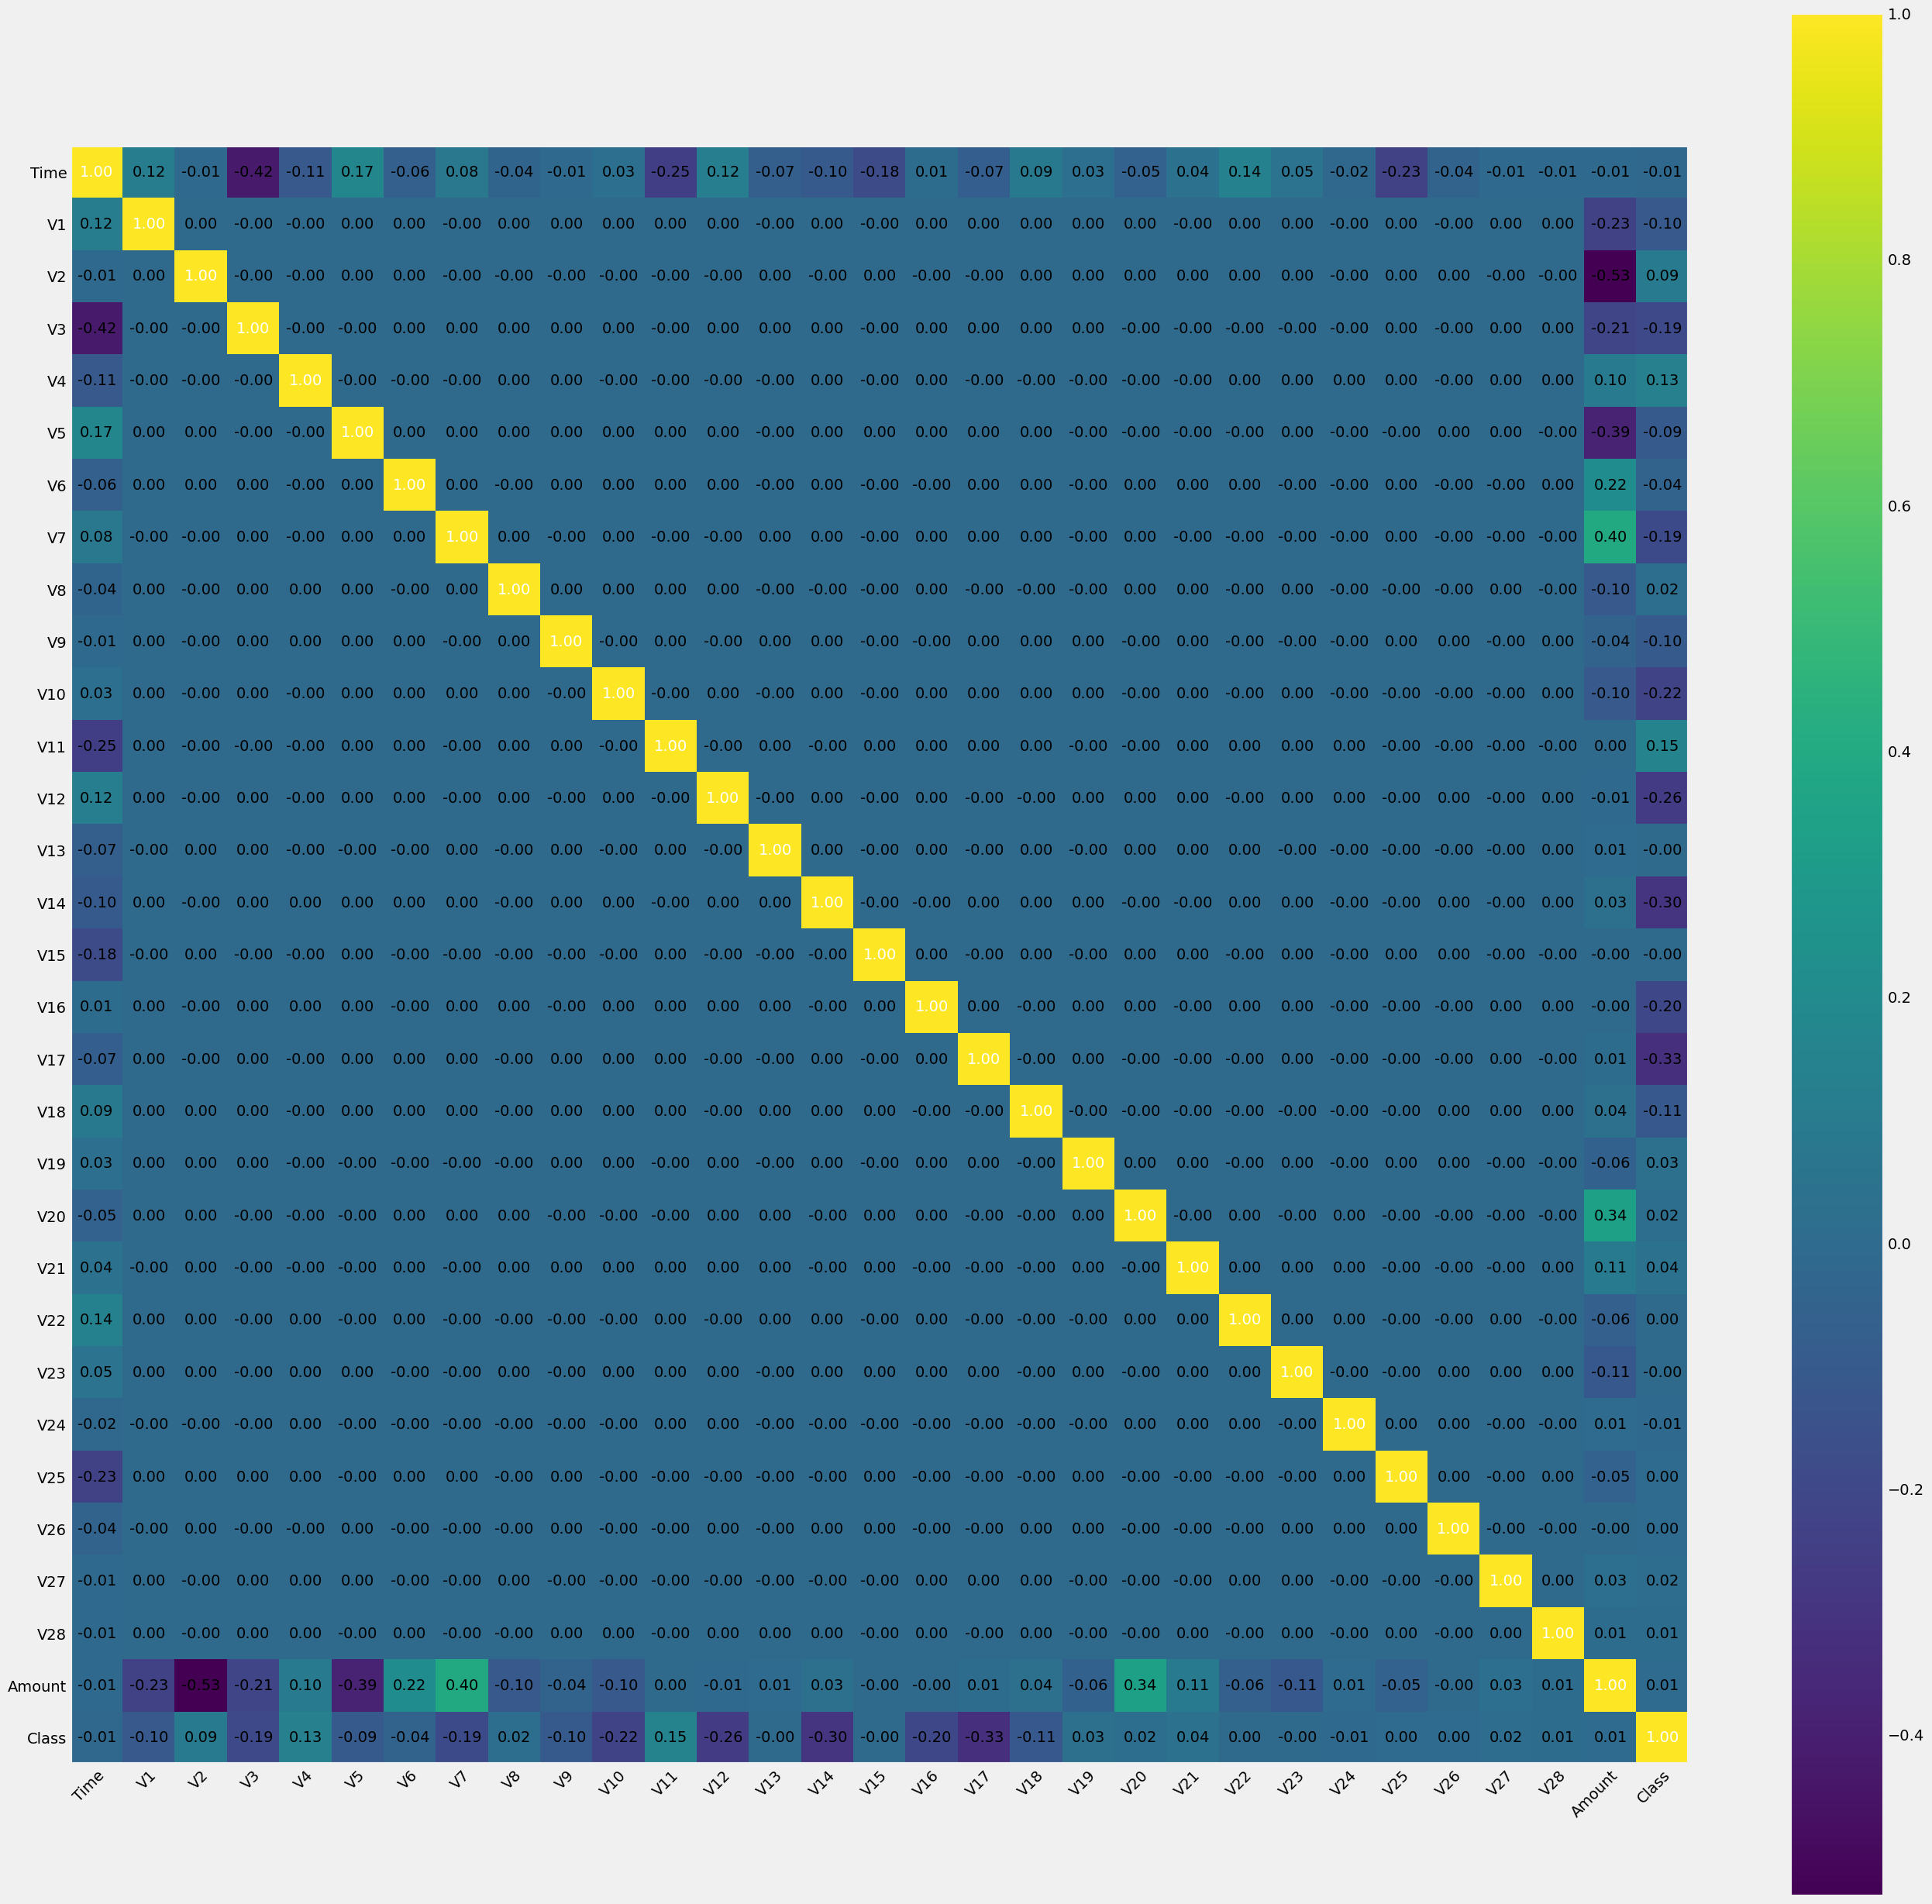

In [11]:
cols = data.columns     # List of colmuns of dataframe Arrival_ddelay
cm = np.corrcoef(data[cols].values.T) 
hm = heatmap(cm, figsize=(30,30), row_names=cols, column_names=cols)  # Represent correlation by a heat map
plt.show()

In [12]:
cols = data.columns     # List of colmuns of dataframe boston_df
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
# Calculate Spearman correlation coefficient between 'Class' and each feature 

for col in cols[:-1]:
    rho, p = spearmanr(data[col].values, data['Class'].values)
    print('Spearman correlation between Class and %s is %s' %(col, round(rho, 4)))

Spearman correlation between Class and Time is -0.0117
Spearman correlation between Class and V1 is -0.0424
Spearman correlation between Class and V2 is 0.0511
Spearman correlation between Class and V3 is -0.0593
Spearman correlation between Class and V4 is 0.063
Spearman correlation between Class and V5 is -0.0301
Spearman correlation between Class and V6 is -0.0384
Spearman correlation between Class and V7 is -0.0483
Spearman correlation between Class and V8 is 0.0227
Spearman correlation between Class and V9 is -0.0495
Spearman correlation between Class and V10 is -0.0596
Spearman correlation between Class and V11 is 0.0601
Spearman correlation between Class and V12 is -0.0629
Spearman correlation between Class and V13 is -0.0037
Spearman correlation between Class and V14 is -0.0646
Spearman correlation between Class and V15 is -0.0028
Spearman correlation between Class and V16 is -0.0499
Spearman correlation between Class and V17 is -0.0443
Spearman correlation between Class and V1

In [14]:
# Define a list of threshold values to test
thresholds = [100, 200, 500, 1000, 2000, 5000]

# Create an empty DataFrame to store results
threshold_results = pd.DataFrame(columns=['Threshold', 'Fraud Rate'])

# Iterate through each threshold value
for threshold in thresholds:
    # Create a binary column indicating whether the transaction amount exceeds the threshold
    data['Above_Threshold'] = (data['Amount'] > threshold).astype(int)
    
    # Calculate the fraud rate for transactions above the threshold
    fraud_rate = data[data['Above_Threshold'] == 1]['Class'].mean()
    
    # Append the threshold and fraud rate to the results DataFrame
    threshold_results = threshold_results.append({'Threshold': threshold, 'Fraud Rate': fraud_rate}, ignore_index=True)

# Print the results
print(threshold_results)

   Threshold  Fraud Rate
0    100.000       0.002
1    200.000       0.003
2    500.000       0.004
3   1000.000       0.003
4   2000.000       0.001
5   5000.000       0.000


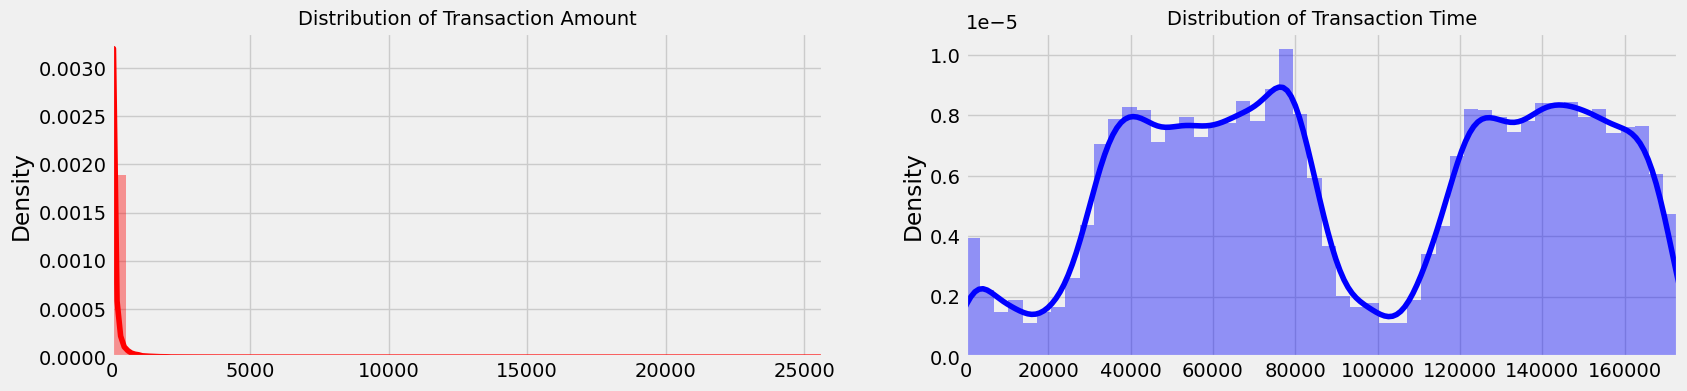

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# Outlier Analysis

In [16]:
# Define the list of features to use
feature_list = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
               'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
               'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

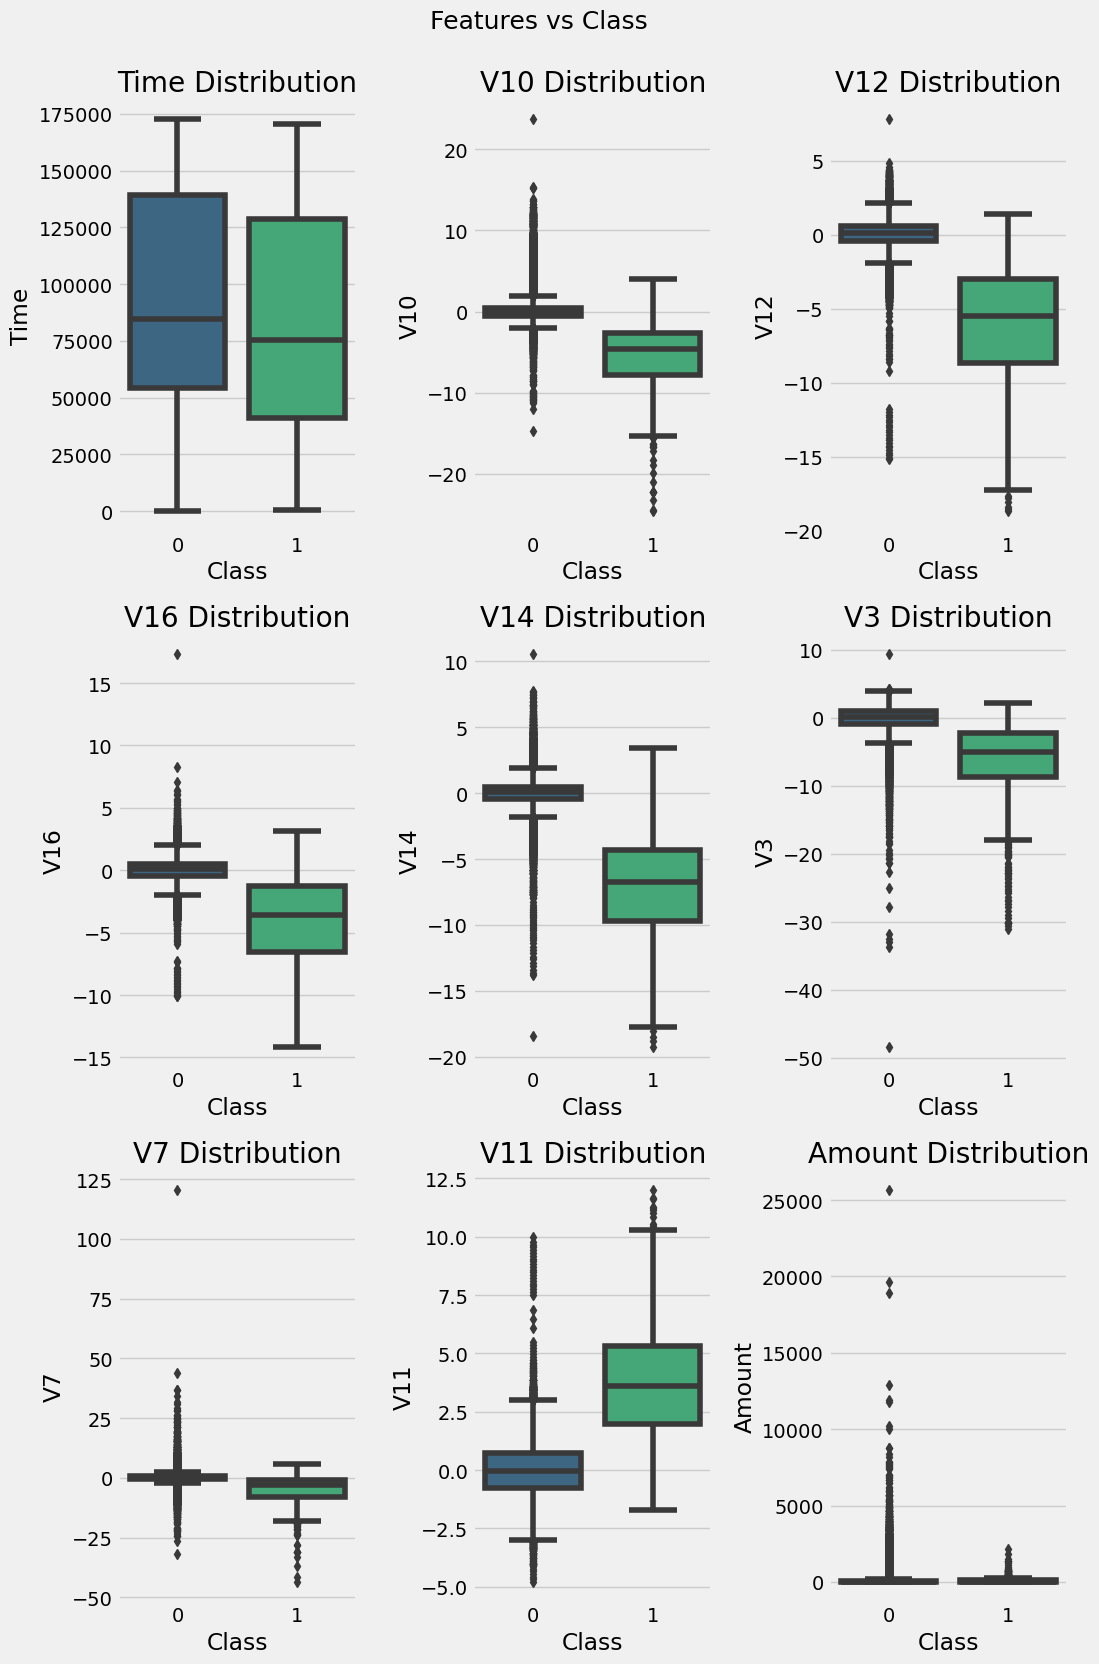

In [20]:
# Create subplots for visualizing features vs. Class
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 17))
fig.suptitle('Features vs Class\n', size=18)

# Define the features you want to visualize
features_to_visualize = ['Time', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11',  'Amount']

# Create boxplots for each feature
for i, feature in enumerate(features_to_visualize):
    row, col = i // 3, i % 3  # Calculate the row and column for the subplot

    # Create a boxplot for the feature grouped by 'Class' using the viridis palette
    sns.boxplot(ax=axes[row, col], data=data, x='Class', y=feature, palette='viridis')
    axes[row, col].set_title(f"{feature} Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Inter Quartile Range

In [22]:

def IQR_method(df, n, features):
    """
    Identify outliers in a DataFrame using the Tukey IQR method.

    Parameters:
    df (DataFrame): The input DataFrame.
    n (int): The minimum number of outliers in an observation to be considered.
    features (list): List of feature column names to analyze for outliers.

    Returns:
    list: A list of indices corresponding to observations with more than 'n' outliers.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # Append the list of outliers
        outlier_list.extend(outlier_list_column)

    # Count occurrences of each outlier index
    outlier_count = Counter(outlier_list)

    # Select observations containing more than 'n' outliers
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]

    # Calculate the total number of outliers
    total_outliers = len(multiple_outliers)
    
    print('Total number of outliers is:', total_outliers)

    return multiple_outliers

In [25]:
# Detecting outliers using the IQR_method function with a threshold of 1 outlier per observation
Outliers_IQR = IQR_method(data, 1, feature_list)

# Dropping outliers from the DataFrame
df_out = data.drop(Outliers_IQR, axis=0).reset_index(drop=True)

Total number of outliers is: 81430


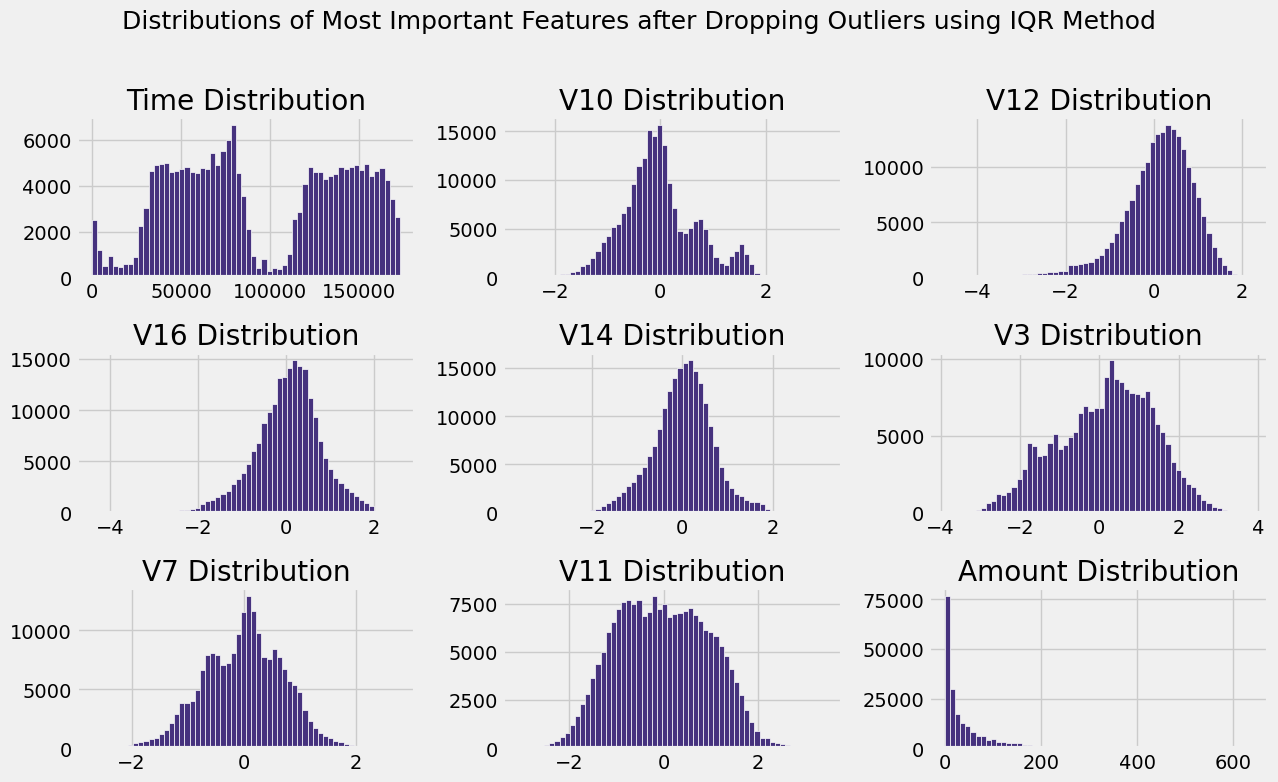

In [27]:
# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create subplots for visualizing the distributions of important features after outlier removal
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features after Dropping Outliers using IQR Method\n', size=18)

# Plot histograms for each feature
axes[0, 0].hist(df_out['Time'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 0].set_title("Time Distribution")

axes[0, 1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 1].set_title("V10 Distribution")

axes[0, 2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 2].set_title("V12 Distribution")

axes[1, 0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 0].set_title("V16 Distribution")

axes[1, 1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 1].set_title("V14 Distribution")

axes[1, 2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 2].set_title("V3 Distribution")

axes[2, 0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 0].set_title("V7 Distribution")

axes[2, 1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 1].set_title("V11 Distribution")

axes[2, 2].hist(df_out['Amount'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("Amount Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()